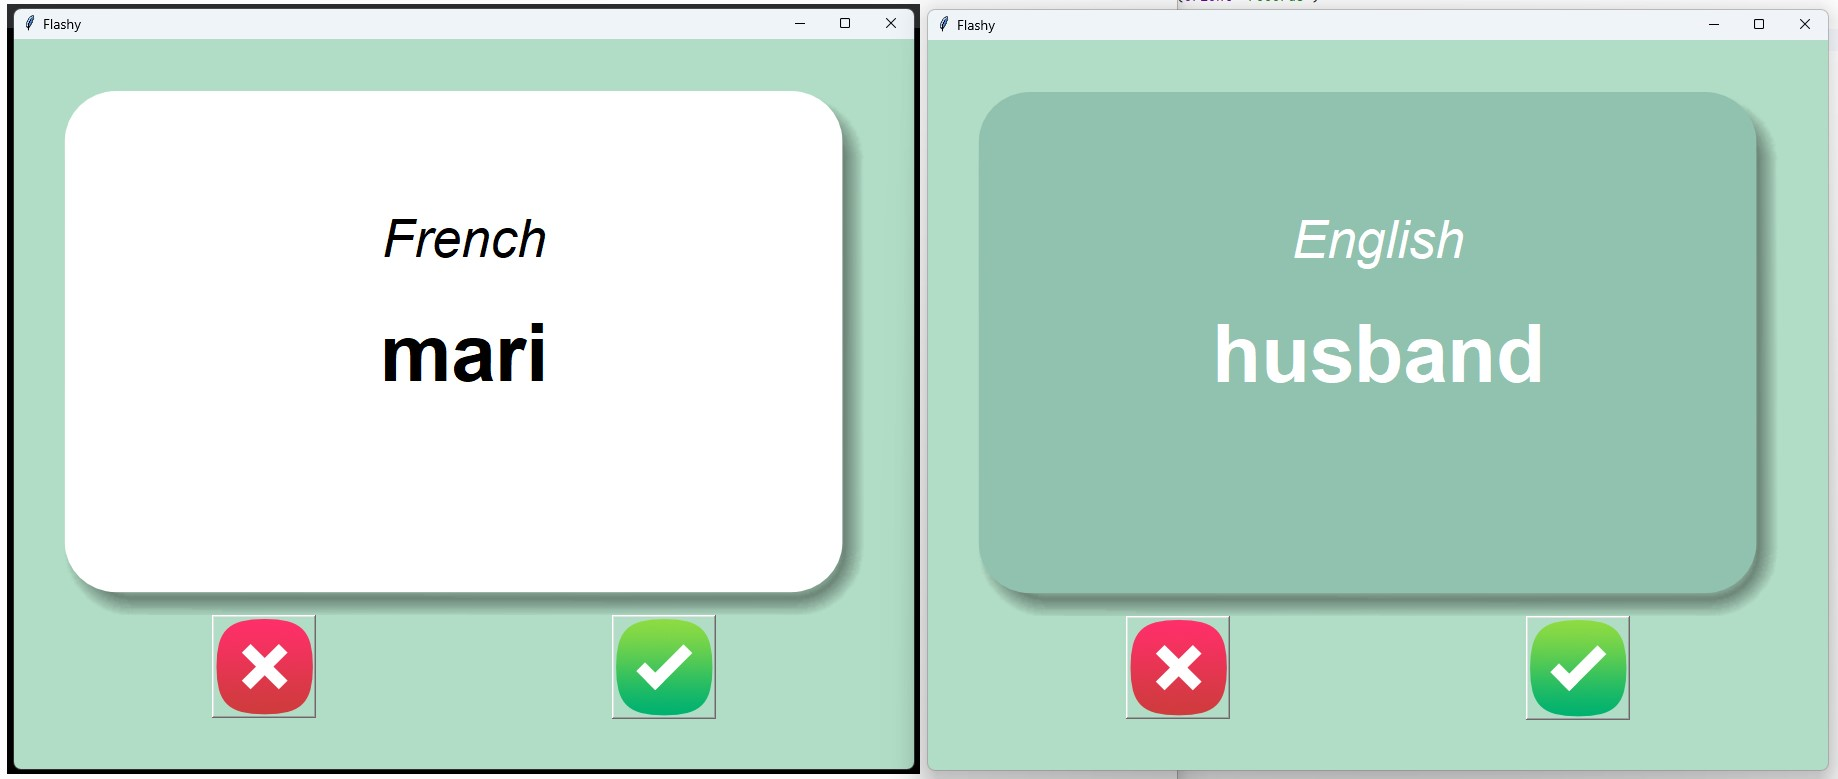

In [1]:
# day31_Capstone Project - Flash Card Program_240807
# playing screen of the program
from PIL import Image
from IPython.display import display
img = Image.open('flashy.jpg')
display(img)

In [ ]:
# main.py
from tkinter import *
import random
import pandas as pd
BACKGROUND_COLOR = "#B1DDC6"

# -----------------------STEP2. WORD GENERATION------------------------------ #
current_card = {}
to_learn = {}

try:
    data = pd.read_csv("data/words_to_learn.csv")
except FileNotFoundError:
    original_data = pd.read_csv("data/french_words.csv")
    to_learn = original_data.to_dict(orient="records")
else:
    to_learn = data.to_dict(orient="records")

# print(to_learn)
# print(len(data))
# print(data.head())
# print(len(words))
# print(to_learn[3]["French"])

def next_card():
    global current_card, flip_timer
    window.after_cancel(flip_timer)
    current_card = random.choice(to_learn)
    canvas.itemconfig(card_title, text="French", fill="black")
    canvas.itemconfig(card_word, text=current_card["French"], fill="black")
    canvas.itemconfig(card_background, image=card_front_img)
    flip_timer = window.after(3000, func=flip_card)  # 3 seconds waited when user stopped in a card.

    # my solution
    # global card_word
    # canvas.itemconfig(card_word, text="")
    # index = random.randint(0, len(to_learn) - 1)
    # # print(index)
    # # print(data.loc[index, 'French'])
    # # quiz = data.loc[index, 'French']  # way to get the value directly from the dataframe
    # quiz = to_learn[index]["French"]
    # canvas.itemconfig(card_word, text=quiz)
    # reflection: I didn't need to use global card_word when i used canvas.itemconfig
    # I used random.randint, teacher use random.choice

# ---------------------------- STEP3. CARD FLASH ------------------------------ #
def flip_card():
    canvas.itemconfig(card_title, text="English", fill="white")
    canvas.itemconfig(card_word, text=current_card["English"], fill="white")
    canvas.itemconfig(card_background, image=card_back_img)


# ---------------------------- STEP4. SAVE RESULT ------------------------------ #
def is_known():
    next_card()
    to_learn.remove(current_card)
    # print(len(to_learn))
    data = pd.DataFrame(to_learn)
    data.to_csv("data/words_to_learn.csv", index=False)


# def unknown_card():
#     next_card()
#     df = pd.DataFrame(current_card)
#     try:
#         word_to_learn_data = pd.read_csv("./words_to_learn.csv")
#     except FileNotFoundError:
#         df.to_csv("./words_to_learn.csv")  # file creation
#     else:
#         new_df = word_to_learn_data.append(df)  # add the word
#         new_df.to_csv("./words_to_learn.csv")


# ----------------------------- STEP1. UI SETUP ------------------------------- #

window = Tk()
window.title("Flashy")
window.config(padx=50, pady=50, bg=BACKGROUND_COLOR)

flip_timer = window.after(3000, func=flip_card)

# Canvas
canvas = Canvas(width=800, height=526, bg=BACKGROUND_COLOR, highlightthickness=0)
card_front_img = PhotoImage(file="./images/card_front.png")
card_back_img = PhotoImage(file="./images/card_back.png")
card_background = canvas.create_image(400, 265, image=card_front_img)
card_title = canvas.create_text(400, 150, text="", fill="black", font=("Arial", 40, "italic"))
card_word = canvas.create_text(400, 263, text="", fill="black", font=("Arial", 60, "bold"))
canvas.grid(row=0, column=0, columnspan=2)

# Buttons
cross_img = PhotoImage(file="./images/wrong.png")
unknown_button = Button(image=cross_img, highlightthickness=0, command=next_card)
unknown_button.grid(row=1, column=0)
check_img = PhotoImage(file="./images/right.png")
known_button = Button(image=check_img, highlightthickness=0, command=is_known)
known_button.grid(row=1, column=1)


window.mainloop()
